In [1]:
import csv
import pandas as pd
import numpy as np
import glob
import qualities
import plotting_func
import matplotlib.pyplot as plt


In [2]:
path = "./csv_files/LilJon-AdaM-CIFAR10/*"
files = glob.glob(path)
print(len(files))

70


In [3]:
results = {} # [epochs][metrics]
for epoch in range(70):
    file = [f for f in files if "-" + str(epoch) + ".csv" in f]
    file = file[0]
    print(file)
    results[epoch] = qualities.correlate(file)

./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_19-48-38-LilJon-CIFAR10-0.csv
zero models deleted: 15
465
./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_20-04-33-LilJon-CIFAR10-1.csv
zero models deleted: 16
464
./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_20-20-23-LilJon-CIFAR10-2.csv
zero models deleted: 15
465
./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_20-36-26-LilJon-CIFAR10-3.csv
zero models deleted: 15
465
./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_20-53-28-LilJon-CIFAR10-4.csv
zero models deleted: 15
465
./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_21-10-08-LilJon-CIFAR10-5.csv
zero models deleted: 15
465
./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_21-27-21-LilJon-CIFAR10-6.csv
zero models deleted: 15
465
./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_21-44-58-LilJon-CIFAR10-7.csv
zero models deleted: 15
465
./csv_files/LilJon-AdaM-CIFAR10\results-07-05-2021_22-03-01-LilJon-CIFAR10-8.csv
zero models deleted: 15
465
./csv_files/LilJon-

In [11]:
#Only want L2 and _0

plotting = {}
plotting['test'] = {}
plotting['gap' ] = {}
for x in results[epoch]['pearson']:
    if('test' in x and ('L2_0' in x or 'path' in x)):
        plotting['test'][x] = {}
    if('gap'  in x and ('L2_0' in x or 'path' in x)):
        plotting['gap' ][x] = {}

for epoch in range(70):
    for x in results[epoch]['pearson']:
        if('test' in x and ('L2_0' in x or 'path' in x)):
            plotting['test'][x][epoch] = results[epoch]['pearson'][x]
        if('gap'  in x and ('L2_0' in x or 'path' in x)):
            plotting['gap'][x][epoch] = results[epoch]['pearson'][x]
print(plotting['test'].keys())


dict_keys(['QS_BE_test_acc_L2_0', 'QS_AE_test_acc_L2_0', 'QE_BE_test_acc_L2_0', 'QE_AE_test_acc_L2_0', 'spec_BE_test_acc_L2_0', 'spec_AE_test_acc_L2_0', 'fro_BE_test_acc_L2_0', 'fro_AE_test_acc_L2_0', 'path_test_acc'])


In [12]:
#Only want L2 and _0, splits into AE and BE
plottingBE = {}
plottingBE['test'] = {}
plottingBE['gap' ] = {}

plottingAE = {}
plottingAE['test'] = {}
plottingAE['gap' ] = {}

for x in results[epoch]['pearson']:
    if('test' in x and 'L2_0' in x):
        if('BE' in x):
            plottingBE['test'][x] = {}
        elif('AE' in x):
            plottingAE['test'][x] = {}

    if('gap'  in x and 'L2_0' in x):
        if('BE' in x):
            plottingBE['gap'][x] = {}
        elif('AE' in x):
            plottingAE['gap'][x] = {}

#plottingBE['test']['path_test'] = results[epoch]['pearson']['path_test_acc']
#plottingBE['gap']['path_gap' ] = results[epoch]['pearson']['path_gap' ]

for epoch in range(70):
    for x in results[epoch]['pearson']:
        if('test' in x and 'L2_0' in x):
            if('BE' in x):
                plottingBE['test'][x][epoch] = results[epoch]['pearson'][x]
            elif('AE' in x):
                plottingAE['test'][x][epoch] = results[epoch]['pearson'][x]
        if('gap'  in x and ('L2_0' in x or 'path' in x)):
            if('BE' in x):
                plottingBE['gap'][x][epoch] = results[epoch]['pearson'][x]
            elif('AE' in x):
                plottingAE['gap'][x][epoch] = results[epoch]['pearson'][x]

In [13]:
#Create Legend
oldBE = plottingBE['test'].keys()
oldAE = plottingAE['test'].keys()

print(oldAE)
legendBE = ['${Q}_{SQ}^{L2}$', '${Q}_{E}^{L2}$', '${Q}_{S}^{L2}$','${Q}_{F}^{L2}$']
legendAE = ['$\widehat{Q}_{SQ}^{L2}$', '$\widehat{Q}_{E}^{L2}$', '$\widehat{Q}_{S}^{L2}$','$\widehat{Q}_{F}^{L2}$']


dict_keys(['QS_AE_test_acc_L2_0', 'QE_AE_test_acc_L2_0', 'spec_AE_test_acc_L2_0', 'fro_AE_test_acc_L2_0'])


In [14]:
COLORS = {'QE_AE_gap_L2_0':     np.array((229, 127, 255))/255,
          'QS_AE_gap_L2_0':     np.array((120, 70, 255))/255,
          'spec_AE_gap_L2_0':  np.array((130, 0, 0))/255,
          'fro_AE_gap_L2_0': np.array((251, 124, 12))/255}
print(COLORS.values())


dict_values([array([0.89803922, 0.49803922, 1.        ]), array([0.47058824, 0.2745098 , 1.        ]), array([0.50980392, 0.        , 0.        ]), array([0.98431373, 0.48627451, 0.04705882])])


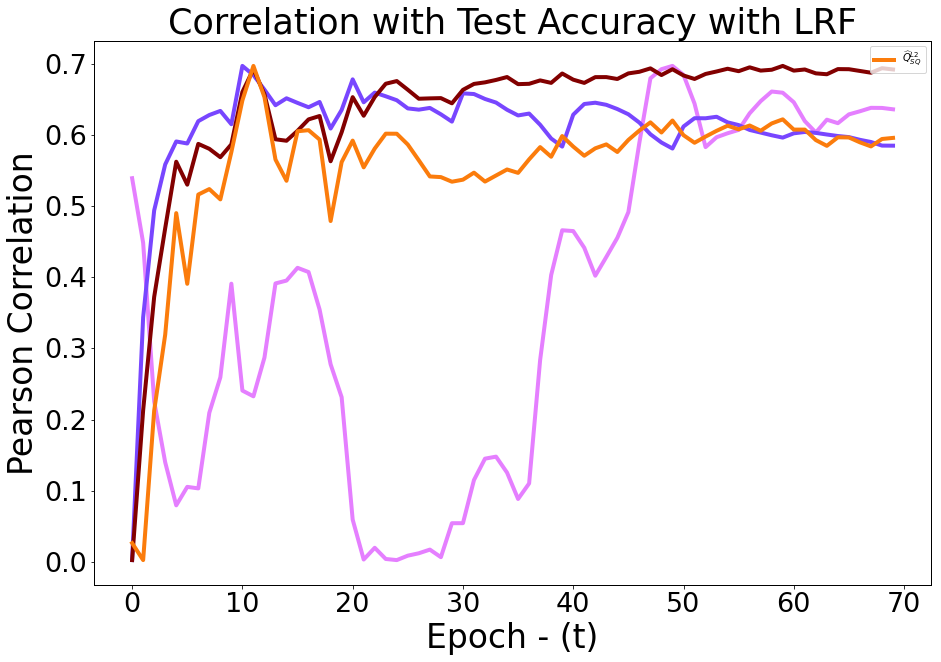

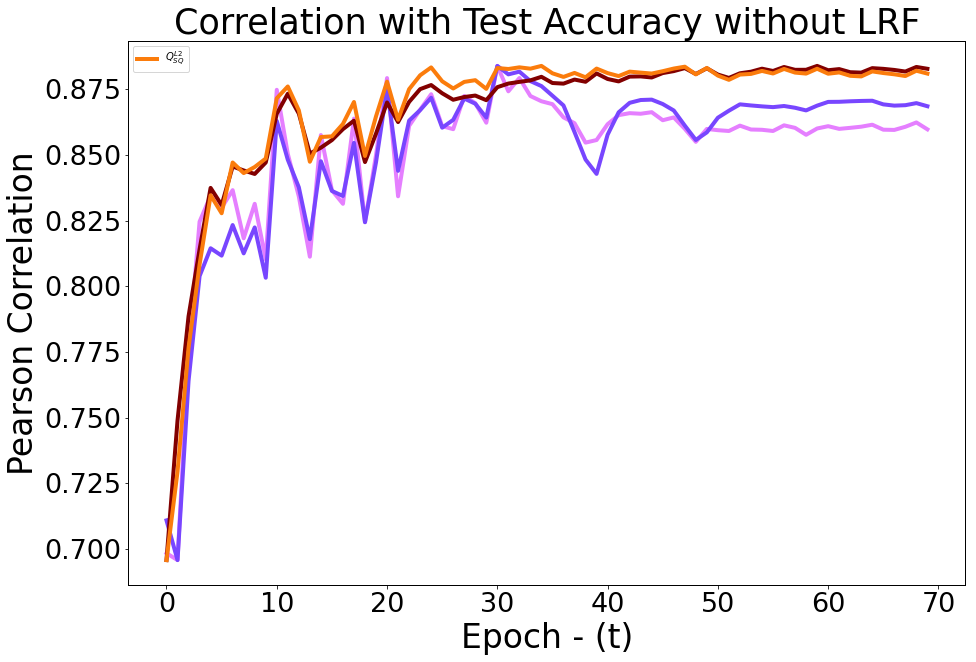

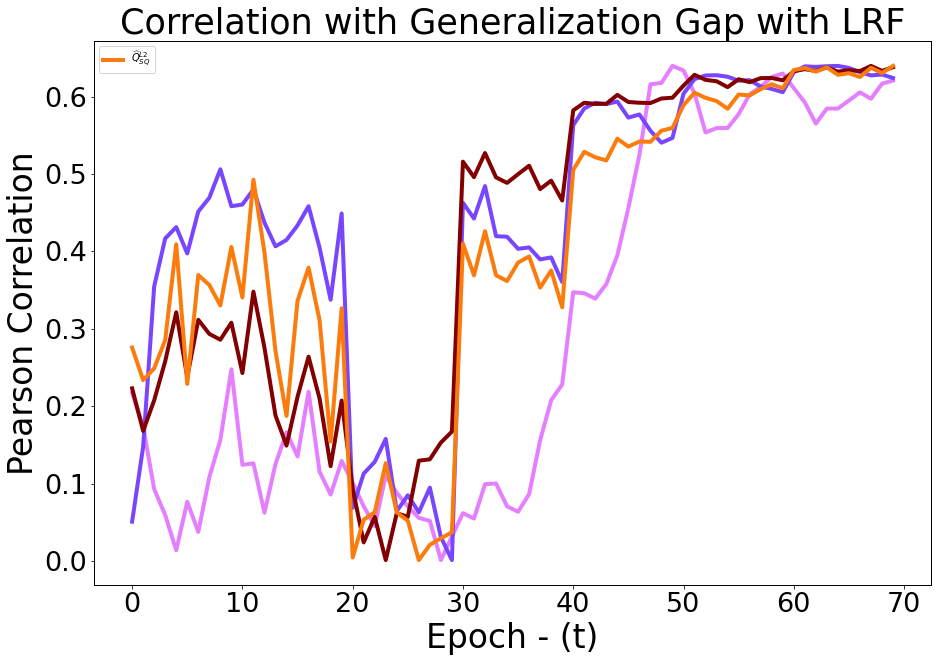

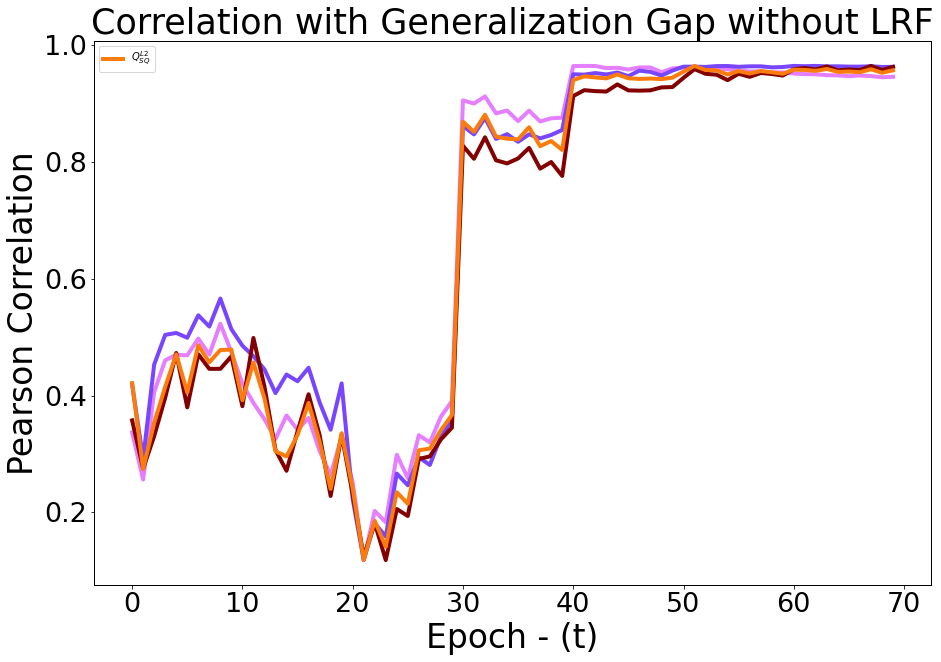

In [26]:
value_list = [plottingAE['test'], plottingBE['test'], plottingAE['gap'], plottingBE['gap']]
title_list = ['Correlation with Test Accuracy with LRF',
              'Correlation with Test Accuracy without LRF',
              'Correlation with Generalization Gap with LRF',
               'Correlation with Generalization Gap without LRF']
legend_list = [legendAE, legendBE, legendAE, legendBE]

COLORS2 = [[0.89803922, 0.49803922, 1.], [0.47058824, 0.2745098 , 1.], [0.50980392, 0, 0],[0.98431373, 0.48627451, 0.04705882]]


#Label Sizes
title_size = 35
x_label_size = 33
y_label_size = 33
x_tick_size = 27
y_tick_size = 27

for p in range(4):
    ax_list = []
    ln_list = []
    fig, ax1 = plt.subplots()
    fig.set_size_inches(15,10)

    ln1 = ax1.plot(value_list[p][list(value_list[p].keys())[0]].keys(), 
                   value_list[p][list(value_list[p].keys())[0]].values(),
                   color=COLORS2[0],lw=4)
    #0
    ax1.set_xlabel('Epoch - (t)',fontsize=x_label_size)
    #ax1.set_yticks([])
    #ax1.set_ylim([0, 1])
    ax1.tick_params(axis = 'y', labelsize = y_tick_size)
    ax1.tick_params(axis='x',labelsize=x_tick_size)
    
    #1
    ax11 = ax1.twinx()
    ln11 = ax11.plot(value_list[p][list(value_list[p].keys())[1]].keys(), 
                     value_list[p][list(value_list[p].keys())[1]].values(),
                    color=COLORS2[1],lw=4)
    ax11.set_yticks([])

    #2
    ax12 = ax1.twinx()
    ln12 = ax12.plot(value_list[p][list(value_list[p].keys())[2]].keys(), 
                     value_list[p][list(value_list[p].keys())[2]].values(),
                    color=COLORS2[2],lw=4)
    ax12.set_yticks([])

    #3
    ax13 = ax1.twinx()
    ln13 = ax13.plot(value_list[p][list(value_list[p].keys())[3]].keys(), 
                     value_list[p][list(value_list[p].keys())[3]].values(),
                    color=COLORS2[3],lw=4)
    ax13.set_yticks([])

    #4
    #ax14 = ax1.twinx()
    ##ln14 = ax14.plot(value_list[p][list(value_list[p].keys())[2]].keys(), 
    #                 value_list[p][list(value_list[p].keys())[2]].values(),
    #                color=COLORS2[0],lw=4)
    #ax14.set_yticks([])

    plt.title(title_list[p], fontsize = title_size)
    plt.xlabel('epoch')
    ax1.set_ylabel('Pearson Correlation', fontsize = x_label_size)
    #plt.legend(legend_list[p])
    #plt.ylim([0, 1])
    plt.savefig('figures/'+ path.split('/')[2] + title_list[p] + '.png', dpi = 500)
    plt.show()

In [25]:
epoch = 69
for x in results[epoch]['pearson']:
    if('gap' in x and 'L2_0' in x and 'BE' in x):
        print(x, results[epoch]['pearson'][x])
    

QS_BE_gap_L2_0 0.945771260538663
QE_BE_gap_L2_0 0.9859349785618227
spec_BE_gap_L2_0 0.5608108507511602
fro_BE_gap_L2_0 0.7071687006239182


In [29]:
#value_list = [plottingAE['test'], plottingBE['test'], plottingAE['gap'], plottingBE['gap']]
#plt.plot(value_list[1]['QS_BE_test_acc_L2_0'].keys(), value_list[1]['QS_BE_test_acc_L2_0'].values())
value_list[1].keys()

dict_keys(['QS_BE_test_acc_L2_0', 'QE_BE_test_acc_L2_0', 'spec_BE_test_acc_L2_0', 'fro_BE_test_acc_L2_0'])